In [1]:
library(data.table)

In [2]:
library(tidyr)

In [3]:
setwd( '/nfs/lab/projects/pbmc_snATAC/analysis_v2/summarized_caqtls/run3')

In [4]:
qtltot = read.table("EUR_caqtl_leads_run3.tsv", header=T)

In [6]:
qtltot$signif = qtltot$flag_fdr10 & qtltot$exclude==FALSE
wide = spread(data = qtltot[,c('Feature', 'cell', 'signif')], key=cell, value =signif )

qtltot$abseffect = abs(qtltot$Effect_size-0.5)

wideEff = spread(data = qtltot[,c('Feature', 'cell', 'abseffect')], key=cell, value =abseffect )

sum(wideEff$Feature != wide$Feature)

[1] 0

In [7]:
celltypes = c('b','mono','nk','t')

colors = read.table('../../peaks/color_scheme.tsv' )

colors = rbind(colors, matrix( c('orange2', 'b','tan4','nk','#7FC97F','mono', 'magenta4', "t"), ncol=2, byrow=T))


In [13]:
### effects in not observed comparing broad and fine cells
celltypes2 = c('act_cd4_t', 'adaptive_NK', 'cDC', 'cMono', 'cyto_cd8_t', 'cyto_nk',
  'iMono', 'mem_b', 'mem_cd8_t', 'mkc', 'naive_b', 'naive_cd4_t', 'naive_cd8_t', 'ncMono', 'tReg')

In [22]:
pdf("../../figures/CompareBulkEffects.pdf")
#options(repr.plot.width=12, repr.plot.height=3)
par(mfrow=c(3,4), mar=c(6,4,4,1))
a = 'bulk'
for (b in celltypes){


wsel = wideEff[ rowSums(wide[,c(a,b)], na.rm=T)==2  ,c(a,b)]

plot(density(wsel[,1]), main=b, lwd=1.5, ylim=c(0,7))
lines(density(wsel[,2]), col=colors$V1[match(b,colors$V2)], lwd=2)
w = wilcox.test(wsel[,1], wsel[,2], alternative = 'two.sided', paired=T)$p.value
mtext(paste("p=",signif(w,2)))
    }
dev.off()

png 
  2

### Do it considering the snp because above was wrong

In [10]:
a = subset(qtltot, cell=="bulk" & signif == TRUE)
a$feature_snp = paste(a$Feature, a$varID, sep="_")

In [22]:
pdf("../../figures/CompareBulkEffects_v2.pdf")
#options(repr.plot.width=12, repr.plot.height=3)
par(mfrow=c(3,4), mar=c(6,4,4,1))

for (c2 in celltypes){


b  = fread(paste0(c2, "_caqtl_sumstats_run3.tsv"), header=T)


b             = subset(b, Is_peak_caQTL==TRUE)
b$feature_snp = paste(b$Feature, b$varID, sep="_")
b$abseffect   = abs(b$Effect_size-0.5)
c             = merge(a,b,by="feature_snp")
c             = subset (c, (Effect_size.x>0.5&Effect_size.y>0.5) | (Effect_size.x<0.5&Effect_size.y<0.5))

plot(density(c$abseffect.x), main=c2, lwd=1.5, ylim=c(0,7))
lines(density(c$abseffect.y), col=colors$V1[match(c2,colors$V2)], lwd=2)
w = wilcox.test(c$abseffect.x, c$abseffect.y, alternative = 'two.sided', paired=T)$p.value
mtext(paste("p=",signif(w,2)))
}
dev.off()

png 
  2

### QQ-plots

In [33]:
qqplotf = function(pvalues, title){
coaccP = sort(-log(pvalues, 10))
set.seed(1)
uniP = runif(length(coaccP))
uniP = sort(-log10(uniP))

plot(uniP, coaccP, pch=20, cex=1, xlab="Theoretical -Log10(P)", ylab="-Log10(P) caQTLs", main =title)
abline(0,1)
chisq <- qchisq(1-pvalues,1)
lgc = median(chisq)/qchisq(0.5,1)
    
    #median(qchisq(p, df=1, lower.tail=FALSE)) / qchisq(0.5, 1)
    mtext(paste("Lgc=", round(lgc,2), "MedianPval=", round(median(pvalues),3)),cex = 0.8)  
}

In [24]:
celltypes = c('bulk','b','mono','nk','t')
celltypes2 = c('act_cd4_t', 'adaptive_NK', 'cDC', 'cMono', 'cyto_cd8_t', 
               'cyto_nk', 'iMono', 'mem_b', 'mem_cd8_t', 'mkc', 
               'naive_b', 'naive_cd4_t', 'naive_cd8_t', 'ncMono', 'tReg')

In [25]:
head(qtltot)

,Feature,varID,Chromosome,position,Ref,Alt,Af,HWEChi_square,IA,Log10_qval,⋯,r2_rSNP,P_VAl,flag_fdr10,flag_fdr05,flag_fdr01,cell,exclude,rsID,signif,abseffect
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<chr>,<lgl>,<chr>,<lgl>,<dbl>
1,chr7:24758459-24759192,chr7:24758818:G:T,chr7,24758818,G,T,0.15,0.311419,0.999894,-14.264826,⋯,0.990518,1.803870e-15,TRUE,TRUE,TRUE,b,FALSE,rs754554,TRUE,0.409767
2,chr13:30945680-30946517,chr13:30945921:T:C,chr13,30945921,T,C,0.60,0.625000,0.997466,-9.569054,⋯,0.992241,6.586914e-11,TRUE,TRUE,TRUE,b,FALSE,rs2149851,TRUE,0.176037
3,chr10:3946733-3947159,chr10:3946975:T:G,chr10,3946975,T,G,0.80,0.625000,0.960408,-9.533919,⋯,0.937457,1.044361e-10,TRUE,TRUE,TRUE,b,FALSE,rs10732924,TRUE,0.290398
4,chr7:44807689-44808463,chr7:44808091:T:G,chr7,44808091,T,G,0.45,1.715131,0.998349,-9.291903,⋯,0.990608,3.364620e-10,TRUE,TRUE,TRUE,b,FALSE,rs1050331,TRUE,0.301672
5,chr12:92341147-92341822,chr12:92341470:G:C,chr12,92341470,G,C,0.65,2.899408,0.996683,-8.863639,⋯,0.985398,1.362139e-09,TRUE,TRUE,TRUE,b,FALSE,rs10777362,TRUE,0.270880
6,chr16:84208883-84209949,chr16:84209049:C:T,chr16,84209049,C,T,0.45,1.715131,0.999153,-7.863591,⋯,0.990930,5.737661e-09,TRUE,TRUE,TRUE,b,FALSE,rs12933059,TRUE,0.350670


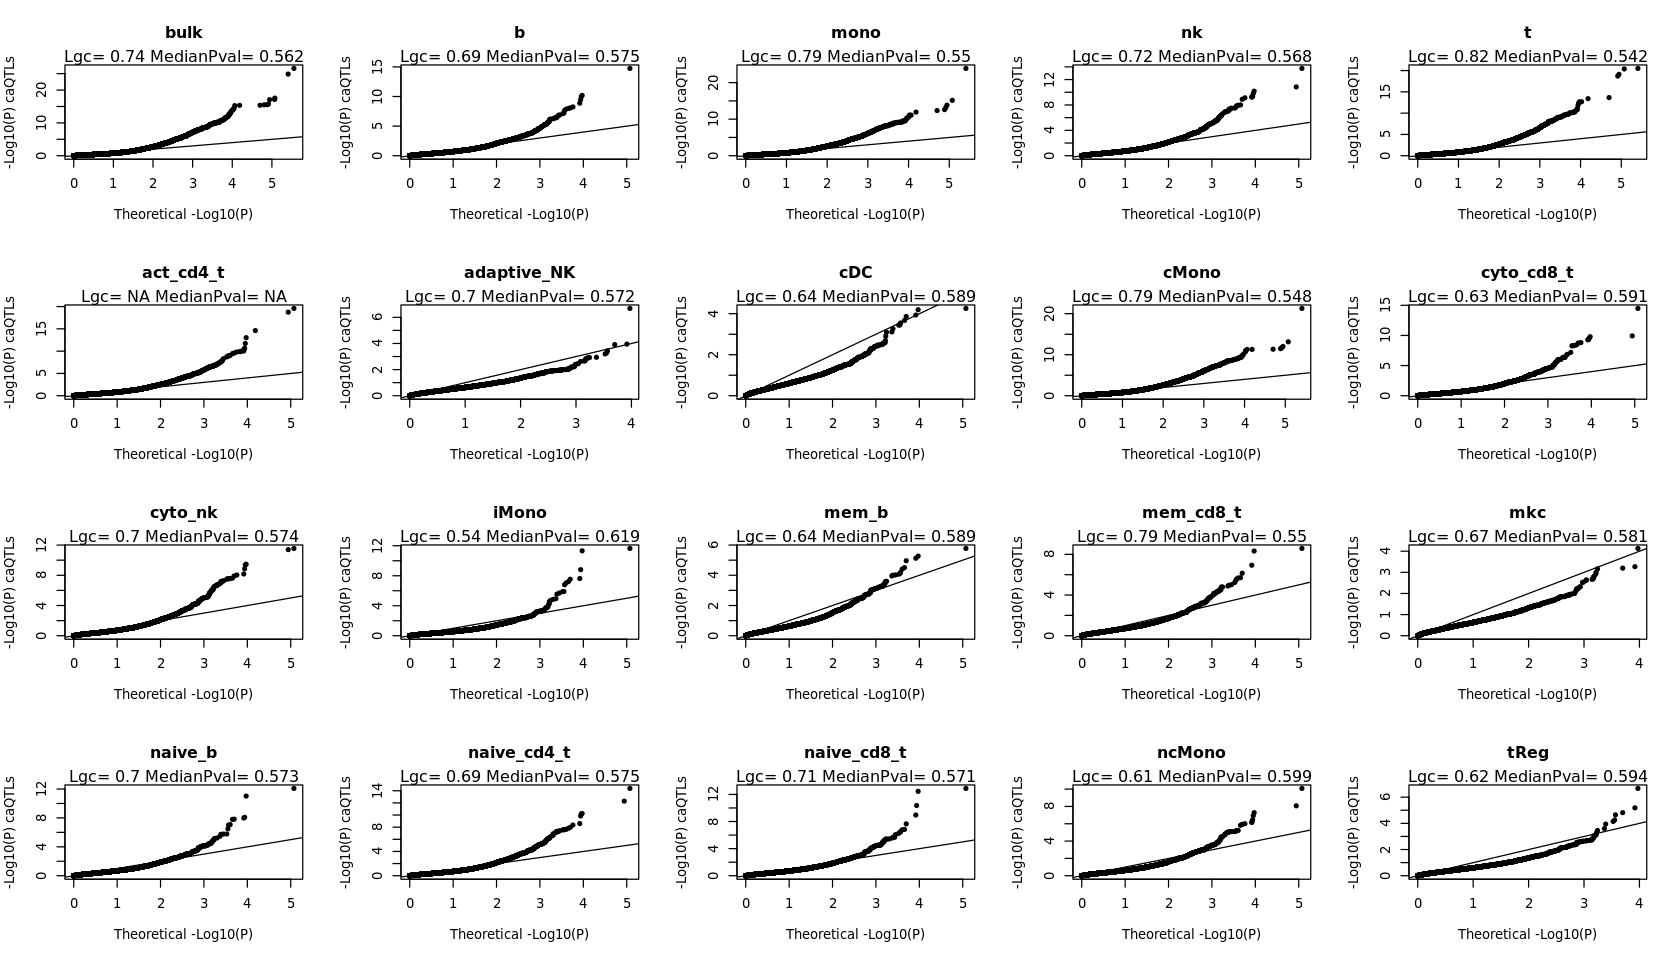

In [35]:
options(repr.plot.width=14, repr.plot.height=8)

par(mfrow=c(4,5))
for (c in c(celltypes,celltypes2)) {
    results_lead = subset(qtltot, cell==c)
    qqplotf(results_lead$P_VAl, c)
    
    }
#dev.off()

In [64]:
results_lead = subset(qtltot, cell=="t")

In [67]:
head(results_lead)

,Feature,varID,Chromosome,position,Ref,Alt,Af,HWEChi_square,IA,Log10_qval,⋯,Convergence_status,r2_fSNPs,r2_rSNP,P_VAl,flag_fdr10,flag_fdr05,flag_fdr01,cell,exclude,rsID
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<chr>,<lgl>,<chr>
225157,chr10:51502604-51504683,chr10:51503178:G:A,chr10,51503178,G,A,0.45,1.715131,0.991469,-20.41608,⋯,0,0.967039,0.979683,3.174941e-21,TRUE,TRUE,TRUE,t,FALSE,rs2611475
225158,chr6:166672201-166673529,chr6:166672966:G:T,chr6,166672966,G,T,0.40,0.277778,0.989443,-20.05267,⋯,0,0.976233,0.983870,4.195234e-21,TRUE,TRUE,TRUE,t,FALSE,rs4367351
225159,chr10:27546208-27546939,chr10:27546467:G:C,chr10,27546467,G,C,0.25,1.111111,0.990104,-18.56679,⋯,0,0.952541,0.978220,7.747115e-20,TRUE,TRUE,TRUE,t,FALSE,rs2488369
225160,chr6:32635924-32636583,chr6:32636376:C:G,chr6,32636376,C,G,0.45,0.001020,0.995562,-17.33367,⋯,0,0.991934,0.991779,1.957835e-19,TRUE,TRUE,TRUE,t,FALSE,rs2856698
225161,chr7:134831931-134833621,chr7:134833233:G:A,chr7,134833233,G,A,0.60,4.444444,0.998298,-13.57669,⋯,0,0.990163,0.984904,2.225781e-14,TRUE,TRUE,TRUE,t,FALSE,rs3735000
225162,chr6:43737236-43739826,chr6:43737873:G:A,chr6,43737873,G,A,0.10,0.123457,0.994865,-12.36474,⋯,0,0.992417,0.983258,3.925262e-14,TRUE,TRUE,TRUE,t,FALSE,chr6:43737873:G:A


### Compare effects using the subsampled bulk

In [5]:
a = read.table("../../rasqual_eur/bulk/bulk025/Results_run2_lead.tsv", header=T)

In [17]:
a$feature_snp = paste(a$Feature, a$rsID, sep="_")

In [8]:
a$exclude =  a$Sequencing_mapping_error_rate>0.1 | a$Ref_allele_bias<0.2 | a$Ref_allele_bias>0.8    
a = subset(a, flag_fdr10 & exclude==FALSE)

In [9]:
dim(a)

[1] 2487   31

In [12]:
a$abseffect = abs(a$Effect_size-0.5)


In [10]:
celltypes = c('b','mono','nk','t')

colors = read.table('../../peaks/color_scheme.tsv' )

colors = rbind(colors, matrix( c('orange2', 'b','tan4','nk','#7FC97F','mono', 'magenta4', "t"), ncol=2, byrow=T))


In [18]:
pdf("../../figures/CompareBulkEffects_subsampleBulk.pdf")
#options(repr.plot.width=12, repr.plot.height=3)
par(mfrow=c(3,4), mar=c(6,4,4,1))

for (c2 in celltypes){


b  = fread(paste0(c2, "_caqtl_sumstats_run3.tsv"), header=T)


b             = subset(b, Is_peak_caQTL==TRUE)
b$feature_snp = paste(b$Feature, b$varID, sep="_")
b$abseffect   = abs(b$Effect_size-0.5)
c             = merge(a,b,by="feature_snp")
c             = subset (c, (Effect_size.x>0.5&Effect_size.y>0.5) | (Effect_size.x<0.5&Effect_size.y<0.5))

plot(density(c$abseffect.x), main=c2, lwd=1.5, ylim=c(0,7))
lines(density(c$abseffect.y), col=colors$V1[match(c2,colors$V2)], lwd=2)
w = wilcox.test(c$abseffect.x, c$abseffect.y, alternative = 'two.sided', paired=T)$p.value
mtext(paste("p=",signif(w,2)))
}
dev.off()

png 
  2

In [21]:
library(stringr)

In [61]:
getASE = function (snp,cellt, Maindir){
chromosome = limma::strsplit2(snp, ":")[1]
#vcf = paste0(Maindir,cellt,"/vcfs_peaksonly/",chromosome ,'.ase.filtered.vcf.gz')
vcf = paste0(Maindir,cellt,"/vcfs_peaksonly/full.ase.filtered.vcf.gz")
tb = read.table(pipe(paste("zgrep", snp,vcf)))
ase = str_split_fixed(t(tb[,10:19]), ":",5)[,5]
me = mean(apply(str_split_fixed(ase, ",",2), 1, function(x) sum(as.numeric(x))))
                return(me)
}

In [54]:
bu = sapply( a$rsID,
            function(y) getASE(y, "bulk025", "/nfs/lab/projects/pbmc_snATAC/analysis_v2/rasqual_eur/bulk/"))

In [55]:
a$average_cov = bu

In [63]:
pdf("../../figures/CompareBulkEffects_compareCoverage.pdf")
#options(repr.plot.width=12, repr.plot.height=3)
par(mfrow=c(3,4), mar=c(6,4,4,1))

for (c2 in celltypes){


b  = fread(paste0(c2, "_caqtl_sumstats_run3.tsv"), header=T)


b             = subset(b, Is_peak_caQTL==TRUE)
b$feature_snp = paste(b$Feature, b$varID, sep="_")
b$abseffect   = abs(b$Effect_size-0.5)
c             = merge(a,b,by="feature_snp")
c             = subset (c, (Effect_size.x>0.5&Effect_size.y>0.5) | (Effect_size.x<0.5&Effect_size.y<0.5))

c$average_covcell =  sapply( c$rsID.x,
            function(y) getASE(y, c2, "/nfs/lab/projects/pbmc_snATAC/analysis_v2/rasqual_eur/broad/"))   
    
plot(density(c$average_cov), main=c2, lwd=1.5)
lines(density(c$average_covcell), col=colors$V1[match(c2,colors$V2)], lwd=2)
w = wilcox.test(c$average_cov, c$average_covcell, alternative = 'two.sided', paired=T)$p.value
mtext(paste("p=",signif(w,2)))
cat (c2, "\n",mean(c$average_cov),"\t" , mean(c$average_covcell))                            
}
dev.off()

b 
 24.03359 	 9.148092mono 
 15.60634 	 26.37651nk 
 22.54402 	 12.50978t 
 19.85645 	 39.39164

png 
  2

In [38]:
t(str_split_fixed(bu, ",",2))

7,4,6,1,0,5,0,5,3,20
0,8,5,4,21,0,20,9,17,0


In [60]:
head(c)

,feature_snp,Feature.x,rsID.x,Chromosome.x,position.x,Ref.x,Alt.x,Af.x,HWEChi_square.x,IA.x,⋯,Log_likelihood_H0.y,Convergence_status.y,r2_fSNPs.y,r2_rSNP.y,P_value,Q_value,exclude.y,Is_peak_caQTL,rsID.y,abseffect.y
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<chr>,<dbl>
1,chr1:1108854-1109596_chr1:1109311:G:A,chr1:1108854-1109596,chr1:1109311:G:A,chr1,1109311,G,A,0.15,0.311419,0.907139,⋯,2.566929,0,0.782127,0.821303,1.518124e-02,2.687558e-02,FALSE,TRUE,rs5010606,0.165648
2,chr1:158087613-158088194_chr1:158087749:G:T,chr1:158087613-158088194,chr1:158087749:G:T,chr1,158087749,G,T,0.40,0.625000,0.999950,⋯,4.817693,0,0.982289,0.991464,9.935171e-04,5.961103e-03,FALSE,TRUE,rs12733819,0.245690
3,chr1:1608851-1610657_chr1:1610539:A:G,chr1:1608851-1610657,chr1:1610539:A:G,chr1,1610539,A,G,0.45,1.551882,0.916530,⋯,4.731035,0,0.846491,0.674224,1.122630e-02,1.816060e-02,FALSE,TRUE,rs6697550,0.175515
4,chr1:165567137-165567928_chr1:165561970:A:C,chr1:165567137-165567928,chr1:165561970:A:C,chr1,165561970,A,C,0.65,0.097814,0.966353,⋯,12.622417,0,0.991704,0.953098,6.220871e-08,5.598784e-07,FALSE,TRUE,rs2138351,0.164291
5,chr1:166893917-166894611_chr1:166894186:G:A,chr1:166893917-166894611,chr1:166894186:G:A,chr1,166894186,G,A,0.55,0.001020,0.995738,⋯,4.780237,0,0.991845,0.991845,7.731062e-04,7.731062e-04,FALSE,TRUE,rs6427046,0.200293
6,chr1:202148980-202149592_chr1:202149439:A:G,chr1:202148980-202149592,chr1:202149439:A:G,chr1,202149439,A,G,0.50,3.600000,0.974837,⋯,2.083323,0,NA,0.965394,3.040281e-02,3.225338e-02,FALSE,TRUE,rs4511180,0.218170
